# Trabajo Práctico Análisis de Datos

In [1]:
!pip install kagglehub --quiet

import kagglehub
import os

# Fuerza a KaggleHub a volver a descargar la versión correcta
path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies")

print("Dataset descargado en:", path)
os.listdir(path)


100%|██████████| 226M/226M [00:01<00:00, 158MB/s]

Extracting files...


Dataset descargado en: /root/.cache/kagglehub/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/versions/719


['TMDB_movie_dataset_v11.csv']

## Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

## Dataset: Full TMDB Movies Dataset 2024 (Version 685 - 05/09/2025)

### Descripción del dataset

Es el dataset completo generado desde TMDb (The Movie Database). TMDb es una base de datos de películas completa que proporciona información sobre mas de 1M de peliculas desde 1916 hasta la actualidad.

Posee las 24 variable mostradas a continuación

Nro | Variable            | Tipo      | Descripción                                                                      |
----|---------------------|-----------|----------------------------------------------------------------------------------|
01  | id                  | int       | Identificador único de cada película.                                            |
02  | title               | str       | Título de la película.                                                           |
03  | vote_average        | float     | Promedio de votos o calificación otorgada por los espectadores.                  |
04  | vote_count          | int       | Cantidad total de votos recibidos por la película.                               |
05  | status              | str       | El estado de la película (p. ej., Lanzada, Rumoreada, En postproducción, etc).   |
06  | release_date        | str       | Fecha en que la película fue estrenada.                                          |
07  | revenue             | int       | Recaudación total generada por la película.                                      |
08  | runtime             | int       | Duración de la película en minutos.                                              |
09  | adult               | bool      | Indica si la película es apta solo para audiencias adultas.                      |
10  | backdrop_path       | str       | URL de la imagen de fondo de la película.                                        |
11  | budget              | int       | Presupuesto asignado para la película.                                           |
12  | homepage            | str       | URL de la página oficial de la película                                          |
13  | imdb_id             | str       | ID de IMDb de la película.                                                       |
14  | original_language   | str       | Idioma original en el que se produjo la película.                                |
15  | original_title      | str       | Título original de la película.                                                  |
16  | overview            | str       | Descripción breve o sinopsis de la película.                                     |
17  | popularity          | float     | Puntuación de popularidad de la película.                                        |
18  | poster_path         | str       | URL de la imagen del póster de la película.                                      |
19  | tagline             | str       | Eslogan o frase memorable asociada con la película.                              |
20  | genres              | str       | Lista de géneros a los que pertenece la película.                                |
21  | production_companies| str       | Lista de compañías productoras involucradas en la película.                      |
22  | production_countries| str       | Lista de países involucrados en la producción de la película.                    |
23  | spoken_languages    | str       | Lista de idiomas hablados en la película.                                        |
24  | keywords            | str       | Lista de palabras clave asociadas con la película.                               |

### Carga del Dataset

In [3]:
base_path = '/root/.cache/kagglehub/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/versions/685'
file_name = 'TMDB_movie_dataset_v11.csv'
path = os.path.join(base_path, file_name)


In [4]:
# Descarga o usa la versión del dataset en caché
base_path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies")

# Nombre del archivo dentro de la carpeta
file_name = 'TMDB_movie_dataset_v11.csv'

# Ruta completa
path = os.path.join(base_path, file_name)

# Lectura segura del CSV (sin conflictos de opciones)
df = pd.read_csv(path, on_bad_lines='skip')

# Confirmamos
print("✅ Dataset cargado correctamente")
print(f"📊 Filas: {df.shape[0]} | Columnas: {df.shape[1]}")
df.head()


✅ Dataset cargado correctamente
📊 Filas: 1300687 | Columnas: 24


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


#### Primera inspección

In [5]:
# Mostrar las dimensiones del DataFrame

filas, columnas = df.shape
print(f"Número de observaciones (filas): {filas}")
print(f"Número de variables (columnas): {columnas}")

# Mostrar las primeras filas

df.head()

Número de observaciones (filas): 1300687
Número de variables (columnas): 24


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


## Análisis de datos


### Inspeccionar y corregir tipos de datos

In [6]:
#Cantidad de datos duplicados
print("Cantidad de datos duplicados:", df.duplicated().sum())


Cantidad de datos duplicados: 377


In [7]:
df[df.duplicated(keep=False)].sort_values(by='title').head(10)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
365979,1213182,"'A'-t'i Xwee-ghayt-nish: Still, We Live On",0.0,0,Released,NaN,0,40,False,NaN,...,"'A'-t'i Xwee-ghayt-nish: Still, We Live On","With their language facing extinction, the Tol...",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365974,1213182,"'A'-t'i Xwee-ghayt-nish: Still, We Live On",0.0,0,Released,NaN,0,40,False,NaN,...,"'A'-t'i Xwee-ghayt-nish: Still, We Live On","With their language facing extinction, the Tol...",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365975,1213182,"'A'-t'i Xwee-ghayt-nish: Still, We Live On",0.0,0,Released,NaN,0,40,False,NaN,...,"'A'-t'i Xwee-ghayt-nish: Still, We Live On","With their language facing extinction, the Tol...",0.6,/q7AG2AnJwCDhokTNKGmzJzIR7Jz.jpg,NaN,Documentary,NaN,United States of America,NaN,NaN
365978,1213182,"'A'-t'i Xwee-ghayt-nish: Still, We Live On",0.0,0,Released,NaN,0,40,False,NaN,...,"'A'-t'i Xwee-ghayt-nish: Still, We Live On","With their language facing extinction, the Tol...",0.6,/q7AG2AnJwCDhokTNKGmzJzIR7Jz.jpg,NaN,Documentary,NaN,United States of America,NaN,NaN
370699,1211217,"12 Tage, 12 Nächte in Damaskus",0.0,0,Released,2017-03-07,0,0,False,NaN,...,"12 Tage, 12 Nächte in Damaskus",NaN,0.6,NaN,NaN,NaN,DOKfilm Fernsehproduktion,Germany,German,NaN
370707,1211217,"12 Tage, 12 Nächte in Damaskus",0.0,0,Released,2017-03-07,0,0,False,NaN,...,"12 Tage, 12 Nächte in Damaskus",NaN,0.6,NaN,NaN,NaN,DOKfilm Fernsehproduktion,Germany,German,NaN
370702,1211217,12 jours et 12 nuits à Damas,0.0,0,Released,NaN,0,0,False,NaN,...,12 jours et 12 nuits à Damas,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370704,1211217,12 jours et 12 nuits à Damas,0.0,0,Released,NaN,0,0,False,NaN,...,12 jours et 12 nuits à Damas,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380127,1192958,50 anni di Formula 1,0.0,0,Released,NaN,0,0,False,NaN,...,50 anni di Formula 1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380124,1192958,50 anni di Formula 1,0.0,0,Released,NaN,0,0,False,NaN,...,50 anni di Formula 1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#borro todas las duplicadas que tienen el mismo título y release_date
df = df.drop_duplicates(subset=['title', 'release_date'], keep='first')


In [9]:
#verifico que no hayan quedado duplicados
print("Cantidad de datos duplicados:", df.duplicated().sum())
print("Duplicados restantes:", df.duplicated(subset=['title', 'release_date']).sum())


Cantidad de datos duplicados: 0
Duplicados restantes: 0


In [10]:
#Transformar formato de fecha, para que todas las release_date tengan el mismo formato

df["release_date"] = pd.to_datetime(df["release_date"])
df.dtypes

,0
id,int64
title,object
vote_average,float64
vote_count,int64
status,object
release_date,datetime64[ns]
revenue,int64
runtime,int64
adult,bool
backdrop_path,object


## Análisis de las variables numéricas

In [11]:
df_numeric = df.select_dtypes(include="number").drop(columns=['id'])


### Analizo ceros
No hay nulos en numéricas.

In [12]:
# Calcular conteo y porcentaje de ceros

zero_stats = pd.DataFrame({
    "Ceros": (df_numeric == 0).sum(),
    "Porcentaje (%)": ((df_numeric == 0).sum() / len(df) * 100).round(1)
})

zero_stats

,Ceros,Porcentaje (%)
vote_average,923439,72.2
vote_count,923175,72.2
revenue,1255742,98.2
runtime,375364,29.4
budget,1208783,94.6
popularity,189042,14.8


In [13]:
df.isnull().sum().sort_values(ascending=False)


,0
homepage,1145211
tagline,1100332
keywords,947539
backdrop_path,947442
production_companies,714437
imdb_id,643611
production_countries,591474
spoken_languages,569037
genres,537306
poster_path,426153


### Histogramas
Logarítmico por diferencia de escalas.

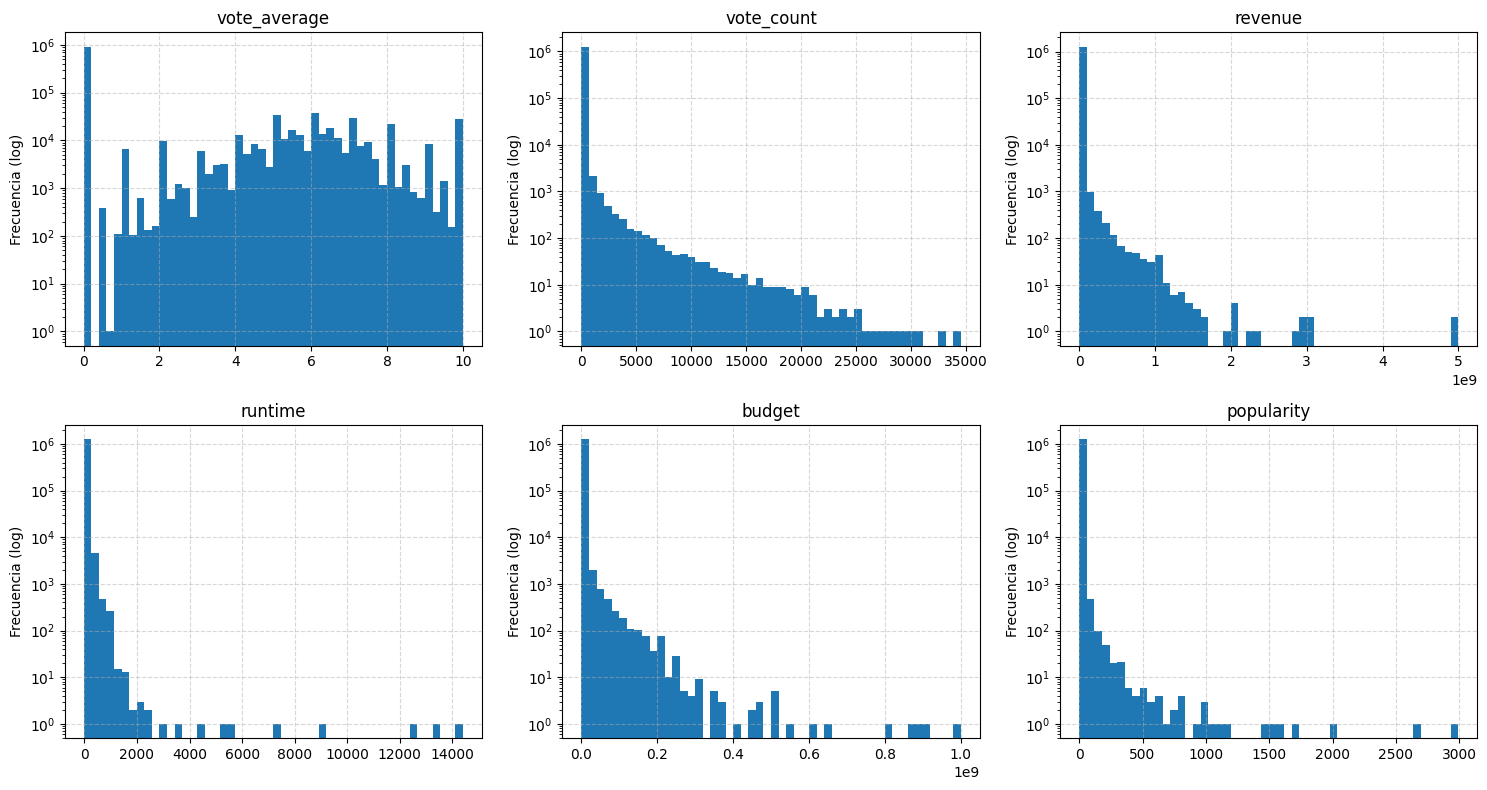

In [14]:
# Configuración de subplots

n_cols = 3
n_rows = -(-len(df_numeric.columns) // n_cols)  # redondeo hacia arriba
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

# Grafico de cada variable

for i, col in enumerate(df_numeric.columns):
    data = df_numeric[col]#[df_numeric[col] != 0]   # descartamos ceros
    axes[i].hist(data, bins=50)
    axes[i].set_yscale("log")                     # eje Y logarítmico
    axes[i].set_title(col)
    axes[i].set_ylabel("Frecuencia (log)")
    axes[i].grid(True, linestyle="--", alpha=0.5)

# Se eliminan subplots vacios

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlacion

Matriz

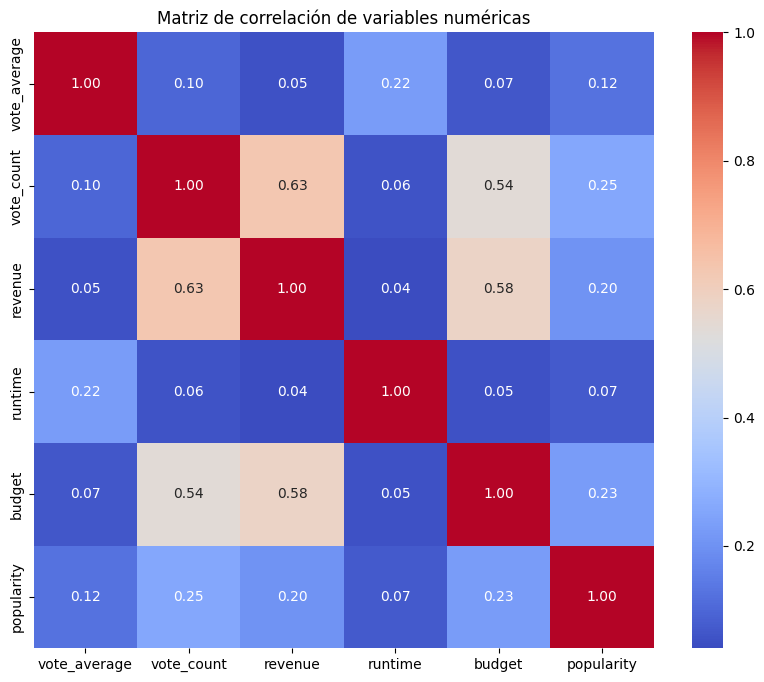

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Matriz de correlación de variables numéricas")
plt.show()

Gráficos de dispersión de las más altas

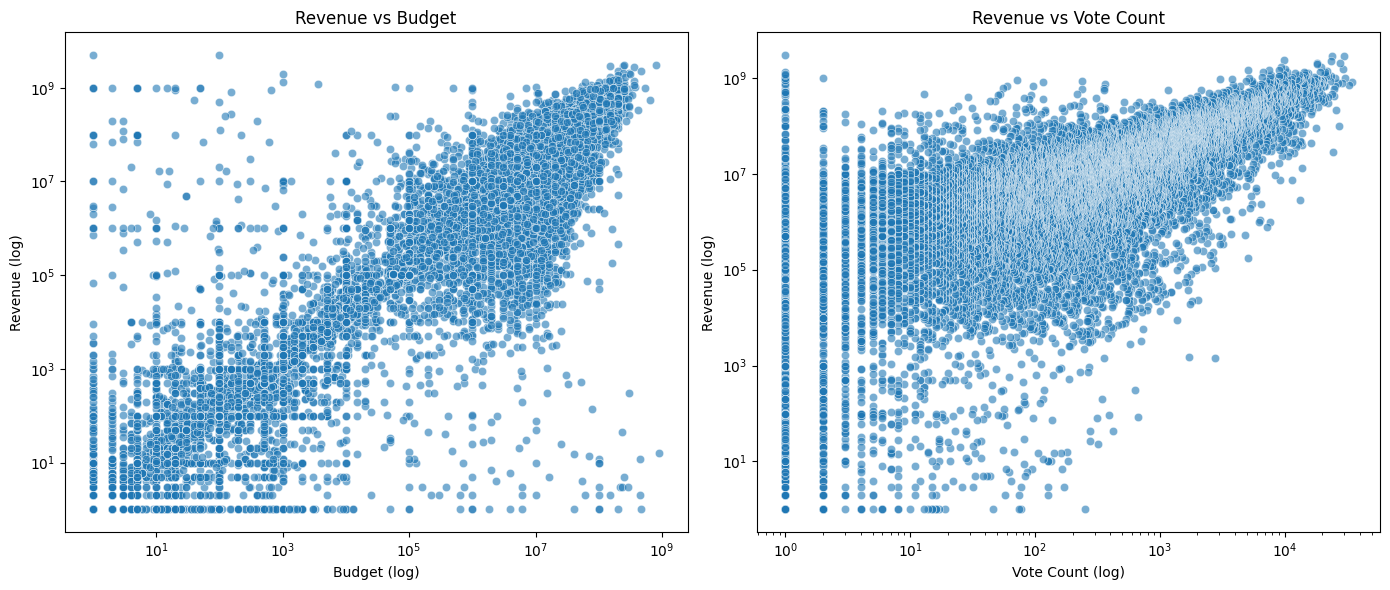

In [16]:
# Crear figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# ---- Gráfico 1: Budget vs Revenue ----
sns.scatterplot(
    x="budget",
    y="revenue",
    data=df_numeric[(df_numeric["budget"] > 0) & (df_numeric["revenue"] > 0)],
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_title("Revenue vs Budget")
axes[0].set_xlabel("Budget (log)")
axes[0].set_ylabel("Revenue (log)")

# ---- Gráfico 2: Revenue vs Vote Count ----
sns.scatterplot(
    x="vote_count",
    y="revenue",
    data=df_numeric[(df_numeric["vote_count"] > 0) & (df_numeric["revenue"] > 0)],
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_title("Revenue vs Vote Count")
axes[1].set_xlabel("Vote Count (log)")
axes[1].set_ylabel("Revenue (log)")

plt.tight_layout()
plt.show()

## Análisis de las variables categóricas

In [17]:
df_categorical_revenue= df[['status', 'adult', 'original_language', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'revenue']]

cols_lists = ["genres", "production_companies", "production_countries", "spoken_languages", "keywords"]

# Convertir las columnas de listas de strings en listas reales

df_categorical_lists = df_categorical_revenue.copy()

for col in cols_lists:
    df_categorical_lists[col] = df_categorical_lists[col].apply(
        lambda x: [item.strip() for item in x.split(",")] if isinstance(x, str) else []
    )

# Expandir las columnas de listas

df_categorical_expanded = df_categorical_lists.copy()

for col in cols_lists:
    if col in df_categorical_expanded.columns:
        df_categorical_expanded = df_categorical_expanded.explode(col, ignore_index=True)


print("Cantidad de filas expandidas:", len(df_categorical_expanded))
df_categorical_expanded.sample(10)

Cantidad de filas expandidas: 9607229


,status,adult,original_language,genres,production_companies,production_countries,spoken_languages,keywords,revenue
6019949,Released,False,fr,Drama,Unité Centrale,Luxembourg,French,toad,0
8507898,Released,False,es,Drama,NaN,NaN,NaN,social critique,0
866310,Released,False,en,Mystery,Canal+,France,Latin,devil,58401898
6129881,Released,False,no,Mystery,Eske & Horn filmproduksjon,Norway,Norwegian,alcoholic,0
7610070,Released,False,es,NaN,Anomalía Films,Venezuela,Spanish,NaN,0
4768429,Released,False,en,Action,Society Entertainment,Brazil,English,drug dealer,0
1509893,Released,False,en,Action,Fin Design & Effects,Singapore,Russian,based on true story,16872691
4788367,Released,False,ca,Adventure,Carolina Films,Spain,English,15th century,0
3435155,Released,False,ja,Adventure,TV Tokyo,Japan,Japanese,anime,0
2387954,Released,False,en,Drama,Detailfilm,Belgium,English,doll,3642692


Cantidad de categorias por variable

In [18]:
resumen = pd.DataFrame({
    "Columna": cols_lists,
    "Categorías únicas": [df_categorical_expanded[col].nunique() for col in cols_lists]
})

print(resumen)

                Columna  Categorías únicas
0                genres                 19
1  production_companies             177490
2  production_countries                250
3      spoken_languages                186
4              keywords              63539


Recaudación acumulada por categoria

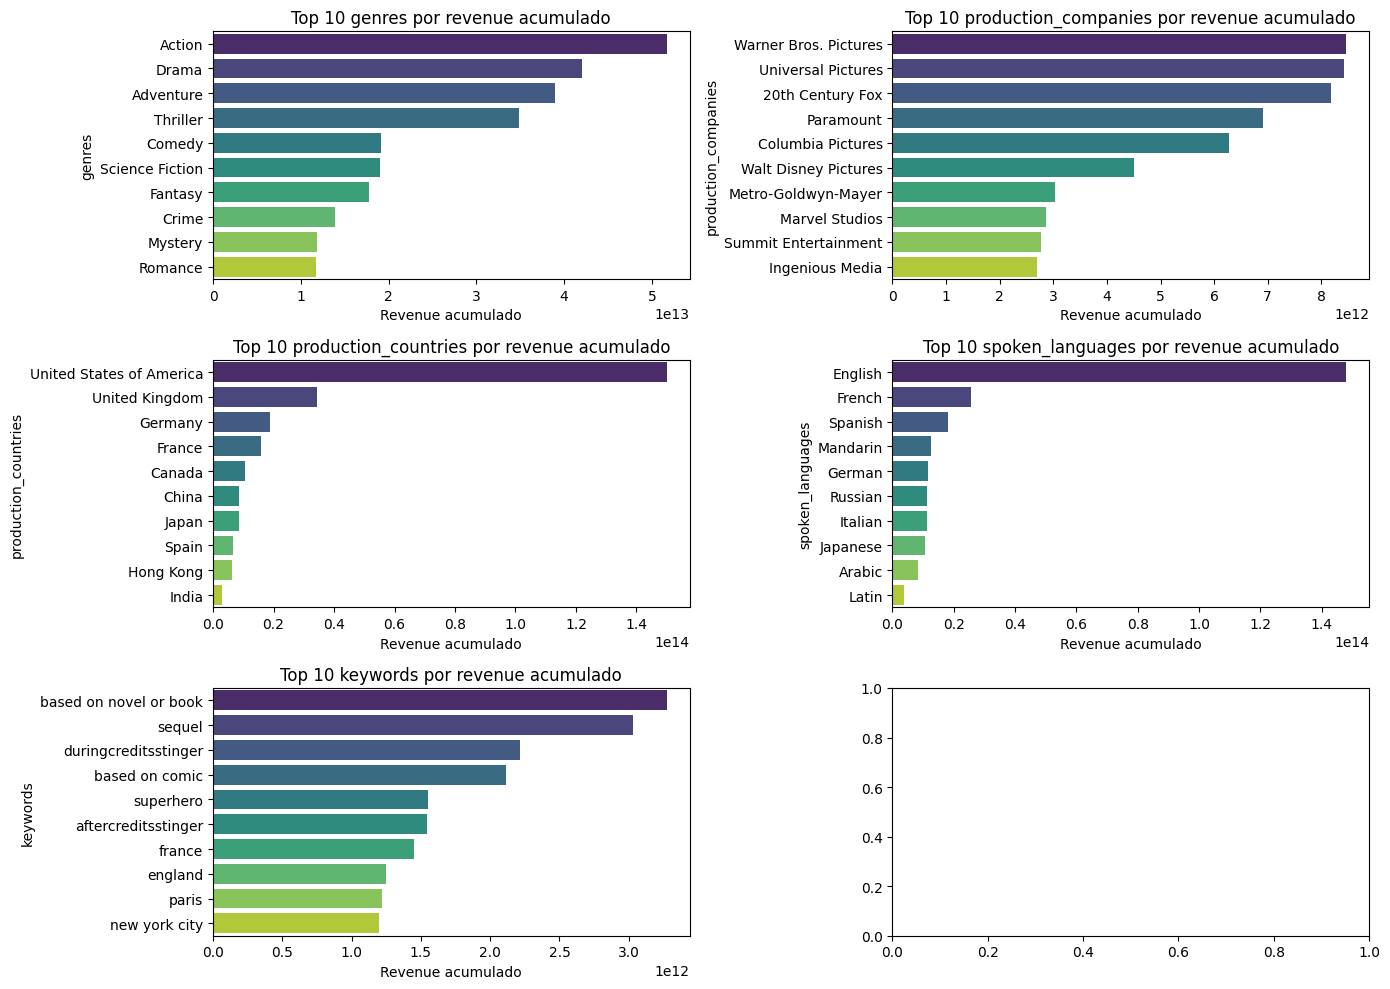

In [19]:
# Lista de columnas categóricas a analizar

cols_lists = ["genres", "production_companies", "production_countries", "spoken_languages", "keywords"]

# Configurar subplots (2 filas x 2 columnas en este caso)

fig, axes = plt.subplots(3, 2, figsize=(14, 10))

for ax, col in zip(axes.flatten(), cols_lists):
    revenue_by_cat = (
        df_categorical_expanded.groupby(col)["revenue"]
        .sum()  # acumulado total
        .sort_values(ascending=False)
        .head(10)  # top 10
    )

    sns.barplot(
        x=revenue_by_cat.values,
        y=revenue_by_cat.index,
        palette="viridis",
        hue=revenue_by_cat.index,
        legend=False,
        ax=ax
    )

    ax.set_title(f"Top 10 {col} por revenue acumulado")
    ax.set_xlabel("Revenue acumulado")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

## Split del dataset

In [20]:
# Tomo como valor a predecir el revenue

from sklearn.model_selection import train_test_split

# Definir la variable objetivo a predecir
y = df['revenue']
X = df.drop(columns=['revenue'])

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (1022577, 23)
Tamaño prueba: (255645, 23)


## Análisis de datos faltantes


In [21]:
# Cantidad y porcentaje de nulos por columna
null_counts = X_train.isna().sum()
null_percent = (null_counts / len(X_train)) * 100

# Mostrar ordenado de mayor a menor
pd.DataFrame({'Nulos': null_counts, 'Porcentaje (%)': null_percent}).sort_values(by='Porcentaje (%)', ascending=False)


,Nulos,Porcentaje (%)
homepage,916203,89.597458
tagline,880017,86.058752
keywords,757910,74.117646
backdrop_path,757451,74.072759
production_companies,571793,55.916865
imdb_id,514853,50.348580
production_countries,473397,46.294509
spoken_languages,455045,44.499827
genres,429620,42.013462
poster_path,340608,33.308788


In [22]:
#ver si hay valores 0 en campos que no deberían
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    zeros = (X_train[col] == 0).sum()
    if zeros > 0:
        print(f"{col}: {zeros} valores igual a 0")


vote_average: 738414 valores igual a 0
vote_count: 738208 valores igual a 0
runtime: 299971 valores igual a 0
budget: 966989 valores igual a 0
popularity: 151029 valores igual a 0


### Condenso todos los nulos en una sola query, nulos, sospechosos y reales

In [23]:
# Definimos valores sospechosos
suspect_values = ['null', 'none', 'n/a', 'na', 'nan', '', ' ', 'Null', 'None', 'N/A']

# Detectar nulos reales
null_counts = X_train.isna().sum()

# Detectar valores sospechosos en columnas tipo texto
suspect_counts = {}
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        suspect_counts[col] = X_train[col].astype(str).str.lower().isin(suspect_values).sum()
    else:
        suspect_counts[col] = 0

suspect_counts = pd.Series(suspect_counts)

# Detectar ceros en columnas numéricas
zero_counts = {}
for col in X_train.select_dtypes(include=['int64', 'float64']).columns:
    zero_counts[col] = (X_train[col] == 0).sum()
zero_counts = pd.Series(zero_counts).reindex(X_train.columns, fill_value=0)

# Calcular porcentaje de nulos
null_percent = (null_counts / len(X_train)) * 100

# Combinar todo en un solo DataFrame
summary_df = pd.DataFrame({
    'Nulos reales': null_counts,
    'Nulos sospechosos': suspect_counts,
    'Ceros': zero_counts,
    'Porcentaje nulos (%)': null_percent.round(2)
})

# Mostrar ordenado por cantidad total de "faltantes"
summary_df['Total posibles nulos'] = summary_df[['Nulos reales', 'Nulos sospechosos']].sum(axis=1)
summary_df = summary_df.sort_values(by='Total posibles nulos', ascending=False)

display(summary_df)


,Nulos reales,Nulos sospechosos,Ceros,Porcentaje nulos (%),Total posibles nulos
homepage,916203,916215,0,89.60,1832418
tagline,880017,880027,0,86.06,1760044
keywords,757910,757910,0,74.12,1515820
backdrop_path,757451,757451,0,74.07,1514902
production_companies,571793,571793,0,55.92,1143586
imdb_id,514853,514853,0,50.35,1029706
production_countries,473397,473397,0,46.29,946794
spoken_languages,455045,455045,0,44.50,910090
genres,429620,429620,0,42.01,859240
poster_path,340608,340608,0,33.31,681216


### Tratamiento de nulos

Como para las columnas *homepage* y *tagline* el conteo de nulos supera el **80 %**, se eliminarán estas dos variables, puesto que no representan una significancia relevante en el análisis ni aportan información útil para la construcción de modelos predictivos.

De manera similar, se eliminarán otras columnas con alta proporción de valores faltantes o información redundante, tales como *backdrop_path*, *poster_path*, *imdb_id* y *keywords*, ya que corresponden principalmente a identificadores, enlaces o texto libre difícil de estandarizar.

Para las variables categóricas con presencia moderada de nulos (*production_companies*, *production_countries*, *spoken_languages*, *genres* y *overview*), se imputarán los valores faltantes con la categoría **"Unknown"**, preservando así la estructura del dataset sin introducir sesgos.

En el caso de los valores numéricos con ceros que representan ausencia de dato (como *budget* y *runtime*), estos se reemplazarán por valores faltantes (`NaN`) y posteriormente se imputaron mediante la **mediana** de cada variable, con el fin de mantener la robustez frente a posibles outliers.

Finalmente, las variables de tipo fecha (*release_date*) fueron transformadas al formato `datetime`, extrayéndose nuevas columnas como *release_year* y *release_month*, donde los valores faltantes fueron reemplazados por `-1`, garantizando que no queden nulos residuales. También para el caso de los faltantes en release_date, se imputaron fechas usando la mediana.

Como resultado, el dataset final no presenta valores faltantes en ninguna de sus variables, cumpliendo con las buenas prácticas requeridas para su posterior uso en modelos de aprendizaje automático.


Eliminación de columnas


In [24]:
# eliminación de columnas

cols_to_drop = [
    'homepage',
    'tagline',
    'backdrop_path',
    'poster_path',
    'imdb_id',
    'keywords'
]

# Verificamos que existan en el dataset antes de eliminarlas
cols_to_drop = [c for c in cols_to_drop if c in X_train.columns]

X_train.drop(columns=cols_to_drop, inplace=True)
X_test.drop(columns=cols_to_drop, inplace=True)

print("Columnas eliminadas:", cols_to_drop)
print("Shape actual → Train:", X_train.shape, " | Test:", X_test.shape)


Columnas eliminadas: ['homepage', 'tagline', 'backdrop_path', 'poster_path', 'imdb_id', 'keywords']
Shape actual → Train: (1022577, 17)  | Test: (255645, 17)


Imputación de valores faltantes en variables categóricas

In [25]:
# Columnas categóricas con nulos moderados
cat_cols_fill = [
    'production_companies',
    'production_countries',
    'spoken_languages',
    'genres',
    'overview'
]

# Rellenar nulos con "Unknown"
for X in (X_train, X_test):
    for c in cat_cols_fill:
        if c in X.columns:
            X[c] = X[c].fillna('Unknown')

print("Imputación con 'Unknown' aplicada en:", cat_cols_fill)

Imputación con 'Unknown' aplicada en: ['production_companies', 'production_countries', 'spoken_languages', 'genres', 'overview']


In [26]:
from sklearn.impute import SimpleImputer

# Variables numéricas con ceros que representan ausencia de dato
num_zero_as_nan = ['budget', 'runtime']

# Reemplazar ceros por NaN
for X in (X_train, X_test):
    for c in num_zero_as_nan:
        if c in X.columns:
            X.loc[X[c] == 0, c] = np.nan

# Crear imputador de mediana (fit solo en train)
num_cols = X_train.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='median')

# Aplicar imputación
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

Vamos a trabajar el campo release_date que tiene faltantes, vamos a imputar con la mediana del año

In [27]:
# Imputar release_date
mediana_fecha = X_train['release_date'].median()
X_train['release_date'].fillna(mediana_fecha, inplace=True)
X_test['release_date'].fillna(mediana_fecha, inplace=True)

print(f"Fecha imputada (mediana): {mediana_fecha}")
print(f"Nulos restantes en release_date (TRAIN): {X_train['release_date'].isna().sum()}")
print(f"Nulos restantes en release_date (TEST): {X_test['release_date'].isna().sum()}")


Fecha imputada (mediana): 2011-09-02 00:00:00
Nulos restantes en release_date (TRAIN): 0
Nulos restantes en release_date (TEST): 0


/tmp/ipython-input-4172717606.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['release_date'].fillna(mediana_fecha, inplace=True)
/tmp/ipython-input-4172717606.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

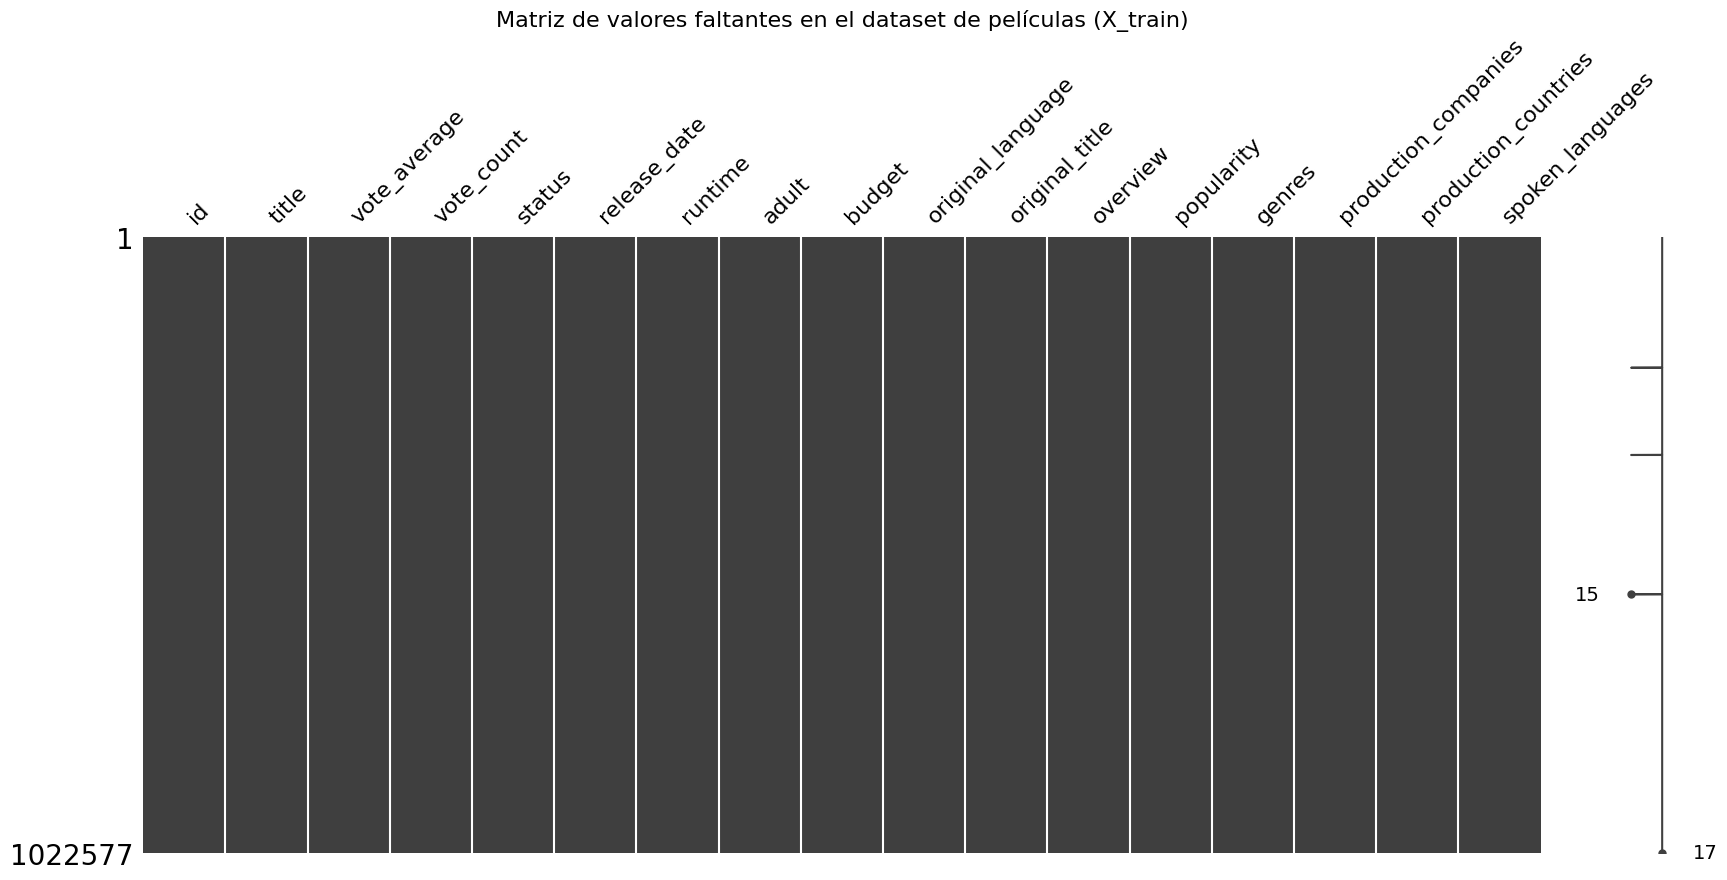

In [28]:
# Visualizar la matriz de valores faltantes en el conjunto de entrenamiento despues del tto de nulos
msno.matrix(X_train, figsize=(20,8))

plt.title("Matriz de valores faltantes en el dataset de películas (X_train)", fontsize=16)
plt.show()

## Análisis de outliers


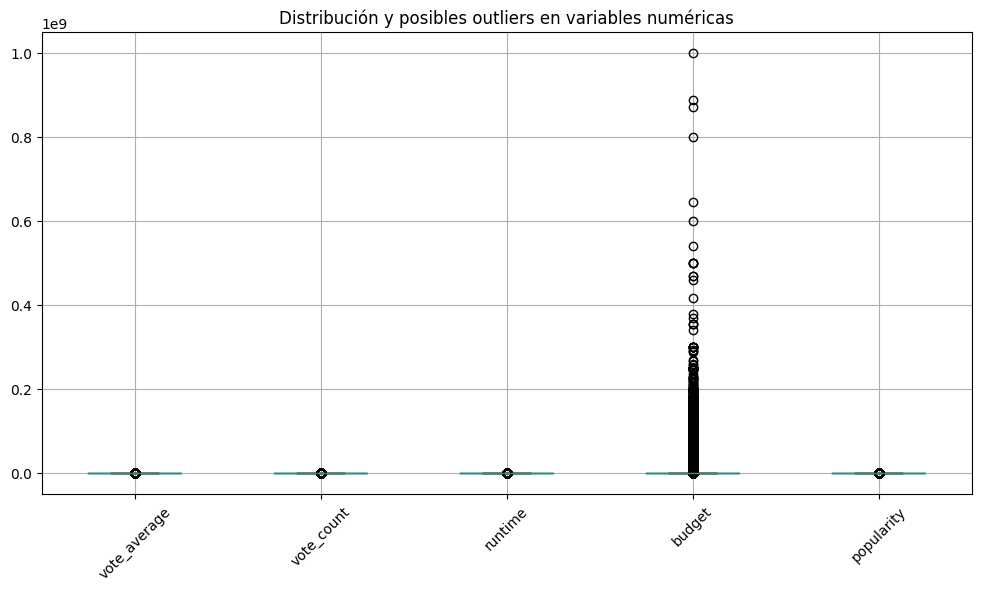

In [29]:
# Seleccionar las columnas numéricas relevantes
num_cols = ['vote_average', 'vote_count', 'runtime', 'budget', 'popularity']

# Visualizar con boxplots para ver valores extremos
plt.figure(figsize=(12, 6))
X_train[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Distribución y posibles outliers en variables numéricas")
plt.show()


In [30]:
import numpy as np

# Columnas numéricas sin incluir revenue
num_cols = ['vote_average', 'vote_count', 'runtime', 'budget', 'popularity']

# Calcular IQR
Q1 = X_train[num_cols].quantile(0.25)
Q3 = X_train[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers
outliers = ((X_train[num_cols] < (Q1 - 1.5 * IQR)) | (X_train[num_cols] > (Q3 + 1.5 * IQR))).sum()

print("Cantidad de posibles outliers por variable:\n")
print(outliers)


Cantidad de posibles outliers por variable:

vote_average     21982
vote_count      140548
runtime          18583
budget           54104
popularity      366341
dtype: int64


### Tratamiento de outliers


En esta etapa se realizará el tratamiento de valores extremos en las variables numéricas, con el objetivo de reducir la influencia de observaciones anómalas y asegurar que todas las magnitudes sean coherentes con el dominio del problema.

* vote_average: se verificará que los valores se encuentren dentro del rango permitido (0 a 10). Dado que esta variable ya está acotada por naturaleza, no requerirá transformaciones adicionales.

* vote_count, budget y popularity: presentan distribuciones fuertemente sesgadas hacia la derecha (muchas películas con valores bajos y pocas con valores extremadamente altos). Para reducir esta asimetría y mitigar el impacto de los valores extremos, se aplicará una transformación logarítmica (log1p) tanto en el conjunto de entrenamiento como en el de prueba.

* runtime: no deben existir películas con duraciones irreales (por ejemplo, menores a 30 minutos o mayores a 300 minutos). En estos casos, los valores fuera de rango se reemplazarán por la mediana de las observaciones dentro del rango válido, conservando así la coherencia de la distribución sin eliminar registros.

Al finalizar este proceso, las variables numéricas quedarán dentro de rangos plausibles, con una distribución más estable y adecuada para las etapas posteriores del modelado.

In [31]:
# Verificar rango válido para vote_average (0 a 10)
out_of_range = X_train[(X_train['vote_average'] < 0) | (X_train['vote_average'] > 10)]
print(f"Películas con vote_average fuera del rango [0, 10]: {len(out_of_range)}\n")
display(out_of_range[['id', 'title', 'vote_average']].head(10))

# Como no existen valores fuera del rango permitido, no se realizará tratamiento adicional.


# Aplicar transformación logarítmica en variables con fuerte sesgo a la derecha
log_cols = ['vote_count', 'budget', 'popularity']

for col in log_cols:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])
    print(f"Transformación logarítmica aplicada en: {col}")

# Verificar resumen estadístico después de la transformación
print("\nDistribución posterior a la transformación logarítmica:\n")
display(X_train[log_cols].describe())


# Corrección de valores anómalos
# No deben existir películas con 0 o 1 minuto ni mayores a 5 horas (300 min)
min_runtime = 30     # películas menores a esto no se consideran "largometrajes"
max_runtime = 300    # 5 horas es un límite razonable

# Detectar cuántas películas están fuera del rango
anomalos = ((X_train['runtime'] < min_runtime) | (X_train['runtime'] > max_runtime)).sum()
print(f"\nPelículas con runtime fuera de rango: {anomalos}")

# Calcular mediana válida del rango lógico
mediana_runtime = X_train.loc[
    (X_train['runtime'] >= min_runtime) & (X_train['runtime'] <= max_runtime),
    'runtime'
].median()

# Reemplazar valores anómalos por la mediana calculada
for X in (X_train, X_test):
    X.loc[(X['runtime'] < min_runtime) | (X['runtime'] > max_runtime), 'runtime'] = mediana_runtime

print(f"Mediana usada para reemplazo: {mediana_runtime}")


Películas con vote_average fuera del rango [0, 10]: 0



,id,title,vote_average


Transformación logarítmica aplicada en: vote_count
Transformación logarítmica aplicada en: budget
Transformación logarítmica aplicada en: popularity

Distribución posterior a la transformación logarítmica:



,vote_count,budget,popularity
count,1.022577e+06,1.022577e+06,1.022577e+06
mean,4.823043e-01,8.547720e+00,5.392106e-01
std,1.067656e+00,1.080090e+00,4.703079e-01
min,0.000000e+00,6.931472e-01,0.000000e+00
25%,0.000000e+00,8.517393e+00,4.700036e-01
50%,0.000000e+00,8.517393e+00,4.700036e-01
75%,6.931472e-01,8.517393e+00,6.097656e-01
max,1.044860e+01,2.072327e+01,7.894166e+00



Películas con runtime fuera de rango: 261920
Mediana usada para reemplazo: 66.0


## Crear nuevos features

Creación de 3 nuevos features

*   release_year (año de estreno)
*   sentiment_score (según vote_average)
*   budget_bin (presupuesto en bins, usando cuantiles del TRAIN)






In [34]:
# --- 0) Seguridad: garantizar tipo datetime en release_date
for X in (X_train, X_test):
    if not np.issubdtype(X['release_date'].dtype, np.datetime64):
        X['release_date'] = pd.to_datetime(X['release_date'], errors='coerce')

# --- 1) release_year
X_train['release_year'] = X_train['release_date'].dt.year
X_test['release_year']  = X_test['release_date'].dt.year

# --- 2) sentiment_score basado en vote_average
def _sentiment(v):
    if pd.isna(v):           # por si quedara algún faltante
        return 'unknown'
    if v >= 7:
        return 'positive'
    elif v >= 5:
        return 'neutral'
    else:
        return 'negative'

X_train['sentiment_score'] = X_train['vote_average'].apply(_sentiment)
X_test['sentiment_score']  = X_test['vote_average'].apply(_sentiment)

# --- 3) budget_bin (bins fijos aprendidos en TRAIN para evitar leakage)
#     Tomamos terciles; guardamos los bordes y los reutilizamos en TEST
_, bins = pd.qcut(X_train['budget'], q=3, retbins=True, duplicates='drop')
bins = np.unique(bins)

# Ampliamos ligeramente los extremos para cubrir valores fuera de rango en TEST
bins[0] = -np.inf
bins[-1] = np.inf
labels = ['low', 'medium', 'high'][:len(bins)-1]

X_train['budget_bin'] = pd.cut(X_train['budget'], bins=bins, labels=labels, include_lowest=True)
X_test['budget_bin']  = pd.cut(X_test['budget'],  bins=bins, labels=labels, include_lowest=True)

# --- 4) Chequeo rápido
print("Nuevos features creados: release_year, sentiment_score, budget_bin\n")

print("TRAIN • sentiment_score:")
print(X_train['sentiment_score'].value_counts(dropna=False).to_string(), "\n")

print("TRAIN • budget_bin:")
print(X_train['budget_bin'].value_counts(dropna=False).to_string(), "\n")

print("TEST • sentiment_score:")
print(X_test['sentiment_score'].value_counts(dropna=False).to_string(), "\n")

print("TEST • budget_bin:")
print(X_test['budget_bin'].value_counts(dropna=False).to_string())


Nuevos features creados: release_year, sentiment_score, budget_bin

TRAIN • sentiment_score:
sentiment_score
negative    796091
neutral     132616
positive     93870 

TRAIN • budget_bin:
budget_bin
low       995480
medium     27097 

TEST • sentiment_score:
sentiment_score
negative    199509
neutral      32900
positive     23236 

TEST • budget_bin:
budget_bin
low       249014
medium      6631


## Discretización

se aplicó discretización sobre dos variables

* budget, donde generé una nueva columna llamada budget_bin, que agrupa las películas según su nivel de presupuesto.
Para eso usé una discretización por cuantiles (qcut), que divide los datos en intervalos con la misma cantidad de observaciones. Esto funciona muy bien cuando la variable es asimétrica, como en este caso, donde hay muchas películas con presupuestos bajos y pocas con presupuestos muy altos.

* Y también sobre vote_average, a partir de la cual creé un nuevo campo que llamé sentiment_score, donde clasifico las películas en positivas, neutras o negativas según su promedio de votos.
Esta discretización no es matemática, sino que está basada en conocimiento del dominio: una película con puntaje alto tiende a tener una recepción positiva, una con puntaje bajo negativa, y una intermedia neutra.

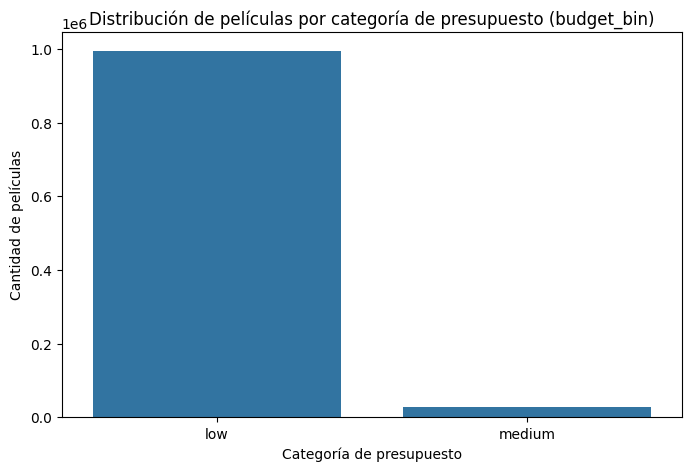

In [35]:
# Visualizar la cantidad de películas por categoría de presupuesto
plt.figure(figsize=(8,5))
sns.countplot(x='budget_bin', data=X_train, order=sorted(X_train['budget_bin'].unique()))
plt.title("Distribución de películas por categoría de presupuesto (budget_bin)")
plt.xlabel("Categoría de presupuesto")
plt.ylabel("Cantidad de películas")
plt.show()


/tmp/ipython-input-1856463307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_score', data=X_train,


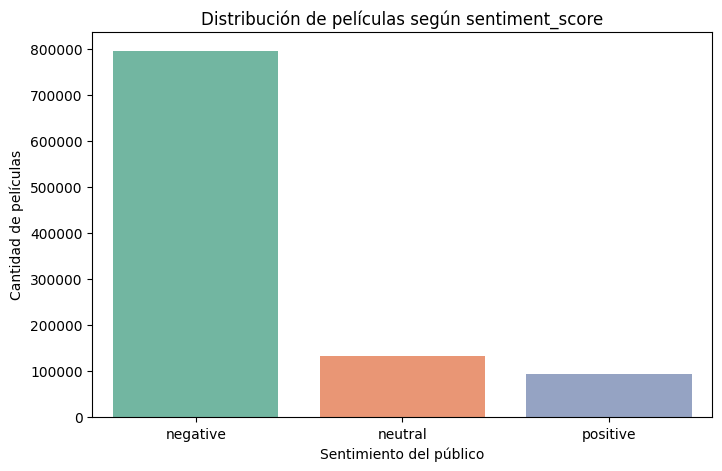

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment_score', data=X_train,
              order=['negative', 'neutral', 'positive'],
              palette='Set2')
plt.title("Distribución de películas según sentiment_score")
plt.xlabel("Sentimiento del público")
plt.ylabel("Cantidad de películas")
plt.show()


In [41]:
print(X_train['sentiment_score'].value_counts(dropna=False))


sentiment_score
negative    796091
neutral     132616
positive     93870
Name: count, dtype: int64


## Reviso la data hasta ahora

In [43]:
import pandas as pd

print("INFORME GENERAL DEL DATASET (X_train)\n")

# 1. Dimensiones
print(f"Filas: {X_train.shape[0]:,}  |  Columnas: {X_train.shape[1]}\n")

# 2. Tipos de datos y cantidad de nulos
print("Tipos de datos y nulos por columna:")
print(X_train.info())
print("\n")

# 3. Resumen numérico de las variables numéricas
print("Estadísticas descriptivas (numéricas):")
display(X_train.describe().T.round(2))

# 4. Resumen de las variables categóricas
print("Resumen de variables categóricas:")
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"  - {col}: {X_train[col].nunique()} categorías | Ejemplo: {X_train[col].unique()[:5]}")

# 5. Ver las primeras filas del dataset final
print("\n Vista previa de las primeras filas del dataset:")
display(X_train.head())


INFORME GENERAL DEL DATASET (X_train)

Filas: 1,022,577  |  Columnas: 20

Tipos de datos y nulos por columna:
<class 'pandas.core.frame.DataFrame'>
Index: 1022577 entries, 588827 to 121970
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1022577 non-null  float64       
 1   title                 1022574 non-null  object        
 2   vote_average          1022577 non-null  float64       
 3   vote_count            1022577 non-null  float64       
 4   status                1022577 non-null  object        
 5   release_date          1022577 non-null  datetime64[ns]
 6   runtime               1022577 non-null  float64       
 7   adult                 1022577 non-null  bool          
 8   budget                1022577 non-null  float64       
 9   original_language     1022577 non-null  object        
 10  original_title        1022574 non-null  object       

,count,mean,min,25%,50%,75%,max,std
id,1022577.0,826814.071252,3.0,453491.0,835517.0,1218069.0,1559600.0,443144.56829
vote_average,1022577.0,1.705031,0.0,0.0,0.0,3.9,10.0,2.940645
vote_count,1022577.0,0.482304,0.0,0.0,0.0,0.693147,10.448599,1.067656
release_date,1022577,2003-01-15 19:18:30.980199936,1800-01-01 00:00:00,1998-09-04 00:00:00,2011-09-02 00:00:00,2018-03-14 00:00:00,2099-12-31 00:00:00,NaN
runtime,1022577.0,77.862738,30.0,66.0,66.0,87.0,300.0,28.033195
budget,1022577.0,8.54772,0.693147,8.517393,8.517393,8.517393,20.723266,1.08009
popularity,1022577.0,0.539211,0.0,0.470004,0.470004,0.609766,7.894166,0.470308
release_year,1022577.0,2002.558845,1800.0,1998.0,2011.0,2018.0,2099.0,24.246143


Resumen de variables categóricas:
  - title: 898720 categorías | Ejemplo: ['Bologna nel lungo 800' 'The Flesh Merchant' 'Air War: Britain'
 'The Guest' 'Crocodile Tears']
  - status: 6 categorías | Ejemplo: ['Released' 'In Production' 'Post Production' 'Planned' 'Canceled']
  - original_language: 176 categorías | Ejemplo: ['it' 'en' 'zh' 'da' 'fr']
  - original_title: 926123 categorías | Ejemplo: ['Bologna nel lungo 800' 'The Flesh Merchant' 'Air War: Britain' '不速之客'
 'Krokodilletårer']
  - overview: 775838 categorías | Ejemplo: ['Unknown'
 'A girl visiting her sister in Hollywood hopes for a modeling career, but is tricked by pimps into working at a brothel.'
 'Return to the early years of World War II, when the Luftwaffe dominated the skies of Europe and tried, night after night, to deliver a knockout blow to England in this documentary featuring extensive original footage from the Battle of Britain. Military historians and surviving pilots explain how the courageous RAF managed to h

,id,title,vote_average,vote_count,status,release_date,runtime,adult,budget,original_language,original_title,overview,popularity,genres,production_companies,production_countries,spoken_languages,release_year,sentiment_score,budget_bin
588827,1390746.0,Bologna nel lungo 800,0.0,0.000000,Released,2011-09-02,66.0,False,8.517393,it,Bologna nel lungo 800,Unknown,0.470004,Documentary,Unknown,Unknown,Unknown,2011,negative,low
162331,94747.0,The Flesh Merchant,4.3,1.386294,Released,1956-01-14,60.0,False,8.517393,en,The Flesh Merchant,A girl visiting her sister in Hollywood hopes ...,0.966984,Drama,Sonney Amusement Enterprises Inc.,United States of America,English,1956,negative,low
947140,275680.0,Air War: Britain,0.0,0.000000,Released,2008-01-01,66.0,False,8.517393,en,Air War: Britain,"Return to the early years of World War II, whe...",0.470004,Unknown,Unknown,Unknown,Unknown,2008,negative,low
89759,394998.0,The Guest,6.7,2.197225,Released,2016-04-01,93.0,False,8.517393,zh,不速之客,"Zheng Kai, a successful businessman, suffers a...",1.262996,"Crime, Thriller",Unknown,"South Korea, China",Mandarin,2016,neutral,low
1216936,705842.0,Crocodile Tears,0.0,0.000000,Released,2019-09-19,30.0,False,8.517393,da,Krokodilletårer,"After 20 years of no contact, the Norwegian Da...",0.470004,Unknown,"Super16, Zentropa Productions 2",Denmark,"Danish, Norwegian",2019,negative,low


### haré una nueva limpieza, eliminaré las columnas title, original_title y overview, son identificadores unicos que no aportan valor predictivo

In [45]:
# Eliminar columnas
cols_to_drop = ['title', 'original_title', 'overview']

X_train.drop(columns=cols_to_drop, inplace=True)
X_test.drop(columns=cols_to_drop, inplace=True)

print("Columnas eliminadas:", cols_to_drop)
print(f"Dimensiones actuales del dataset: {X_train.shape}")


Columnas eliminadas: ['title', 'original_title', 'overview']
Dimensiones actuales del dataset: (1022577, 17)


In [49]:
# ==========================================================
# 🧩 Imputar 'spoken_languages' desconocidos según 'production_countries'
# ==========================================================

# 1️⃣ Crear columnas auxiliares para idioma y país principal
X_train['main_country'] = X_train['production_countries'].str.split(',').str[0].str.strip()
X_test['main_country'] = X_test['production_countries'].str.split(',').str[0].str.strip()

X_train['spoken_languages'] = X_train['spoken_languages'].str.split(',').str[0].str.strip()
X_test['spoken_languages'] = X_test['spoken_languages'].str.split(',').str[0].str.strip()

# 2️⃣ Construir un mapa país → idioma más frecuente (usando TRAIN)
country_lang_map = (
    X_train[X_train['spoken_languages'] != 'Unknown']
    .groupby('main_country')['spoken_languages']
    .agg(lambda x: x.mode()[0])  # modo: idioma más común por país
    .to_dict()
)

# 3️⃣ Función para imputar idioma desconocido o nulo
def imputar_idioma(row):
    if pd.isna(row['spoken_languages']) or row['spoken_languages'] == 'Unknown':
        return country_lang_map.get(row['main_country'], 'English')  # fallback: inglés
    else:
        return row['spoken_languages']

# 4️⃣ Aplicar la imputación a TRAIN y TEST
for X in (X_train, X_test):
    X['spoken_languages'] = X.apply(imputar_idioma, axis=1)

# 5️⃣ Verificar el resultado
print("✅ Distribución de idiomas principales tras imputación:\n")
display(X_train['spoken_languages'].value_counts().head(10))


✅ Distribución de idiomas principales tras imputación:



,count
spoken_languages,
English,622610
French,42079
Spanish,41763
Japanese,41132
German,39256
No Language,25383
Portuguese,21453
Russian,17890
Mandarin,17041


🔹 Combinaciones país-idioma más comunes:



,0
main_country,
Unknown,473397
United States of America,154106
Japan,36718
France,33786
Germany,32166
United Kingdom,31923
Canada,19755
India,17459
Brazil,15360


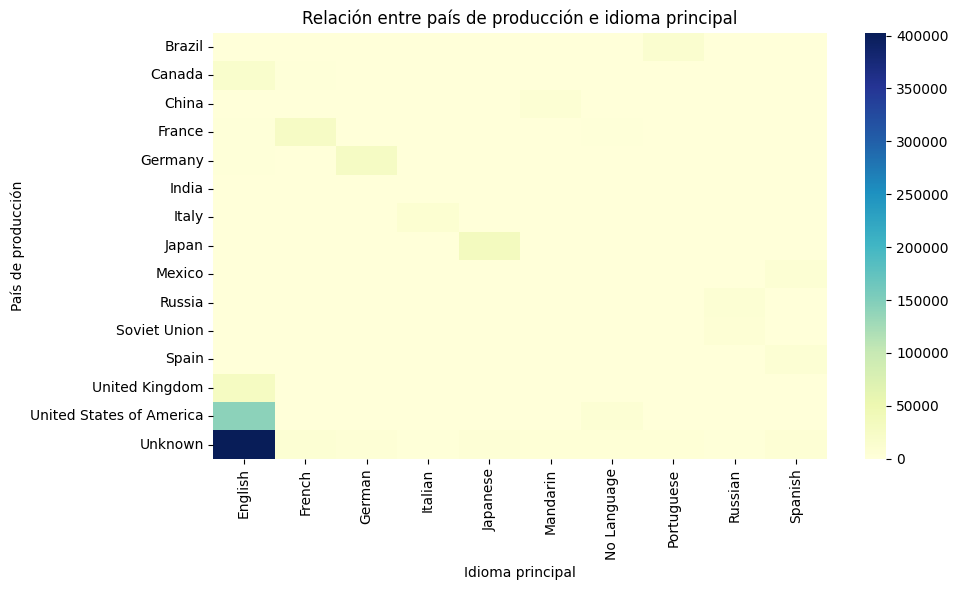


📈 Cramér’s V (asociación país-idioma): 0.485
→ Asociación fuerte: idioma y país están fuertemente relacionados.


In [50]:
# ==========================================================
# 🔍 Análisis de relación entre spoken_languages y production_countries
# ==========================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

# --- 1️⃣ Limpieza: extraer el primer idioma y país principal ---
# Algunos registros tienen múltiples valores separados por coma
X_train['main_language'] = X_train['spoken_languages'].str.split(',').str[0].str.strip()
X_train['main_country'] = X_train['production_countries'].str.split(',').str[0].str.strip()

# --- 2️⃣ Tabla de frecuencia cruzada ---
cross_tab = pd.crosstab(X_train['main_country'], X_train['main_language'])

# Mostramos las combinaciones más frecuentes
print("🔹 Combinaciones país-idioma más comunes:\n")
display(cross_tab.sum(axis=1).sort_values(ascending=False).head(10))

# --- 3️⃣ Visualización con heatmap (solo los 15 más frecuentes) ---
top_countries = X_train['main_country'].value_counts().head(15).index
top_languages = X_train['main_language'].value_counts().head(10).index

plt.figure(figsize=(10,6))
sns.heatmap(
    pd.crosstab(
        X_train.loc[X_train['main_country'].isin(top_countries), 'main_country'],
        X_train.loc[X_train['main_language'].isin(top_languages), 'main_language']
    ),
    cmap="YlGnBu", cbar=True
)
plt.title("Relación entre país de producción e idioma principal")
plt.xlabel("Idioma principal")
plt.ylabel("País de producción")
plt.tight_layout()
plt.show()

# --- 4️⃣ Medida estadística: Cramér’s V ---
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

association = cramers_v(X_train['main_country'], X_train['main_language'])
print(f"\n📈 Cramér’s V (asociación país-idioma): {association:.3f}")

# --- 5️⃣ Interpretación rápida ---
if association < 0.1:
    print("→ Asociación débil o casi nula entre país e idioma.")
elif association < 0.3:
    print("→ Asociación moderada (relación parcial entre país e idioma).")
else:
    print("→ Asociación fuerte: idioma y país están fuertemente relacionados.")
